In [2]:
%matplotlib  inline
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from franke import FrankeFunction, FrankePlot
from mpl_toolkits.mplot3d import Axes3D
import tools
import plotting

In [4]:
seed = 12345
x,y,z,noise = tools.generate_data(N = 1000, seed = seed)
deg = 5

from tools import get_X_poly2D, fit_poly2D
regr = fit_poly2D(x, y, z, deg = deg, lmbd = 0)

zhat = regr.yhat
beta = regr.beta
beta

array([  0.38267453,   4.12415498,   7.85861397, -11.26653785,
       -14.60087479, -34.53732561,  -0.9065217 ,  18.57623835,
        46.01250748,  47.9188046 ,  21.33840134, -28.32786465,
        -6.7988584 , -56.08504677, -22.35571821, -13.51228626,
        16.78849056,  -6.41055131,  11.18184941,  19.94986743,
         0.74100691])

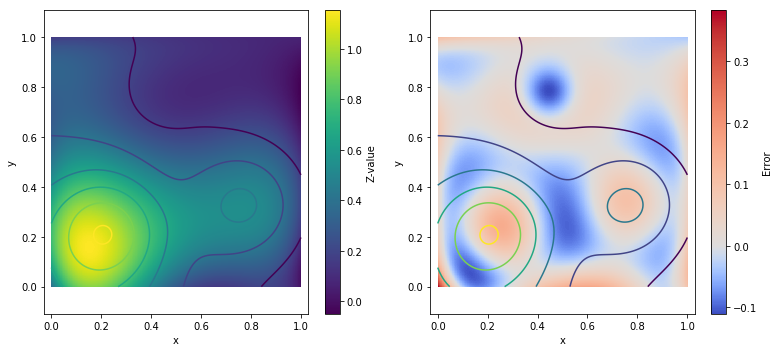

In [11]:
fig = plotting.contour_plot(regr)

In [12]:
z_gt = FrankeFunction(x,y)
zerr = (zhat-z_gt)**2

In [15]:
X = regr._X
var = np.diag(((X.dot(regr.betaVar)) @ X.T))

bias = np.sqrt(np.average(zerr) - np.average(var) - np.average(noise)**2)
bias

0.04201919811040307

(20,) (20,)
(20,) (20,)
(20,) (20,)
(20,) (20,)
(22,) (22,)
(22,) (22,)
(22,) (22,)
(22,) (22,)
(24,) (24,)
(24,) (24,)
(24,) (24,)
(24,) (24,)
(26,) (26,)
(26,) (26,)
(26,) (26,)
(26,) (26,)
(28,) (28,)
(28,) (28,)
(28,) (28,)
(28,) (28,)
(30,) (30,)
(30,) (30,)
(30,) (30,)
(30,) (30,)
(32,) (32,)
(32,) (32,)
(32,) (32,)
(32,) (32,)
(34,) (34,)
(34,) (34,)
(34,) (34,)
(34,) (34,)
(36,) (36,)
(36,) (36,)
(36,) (36,)
(36,) (36,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(40,) (40,)
(42,) (42,)
(42,) (42,)
(42,) (42,)
(42,) (42,)
(44,) (44,)
(44,) (44,)
(44,) (44,)
(44,) (44,)
(46,) (46,)
(46,) (46,)
(46,) (46,)
(46,) (46,)
(48,) (48,)
(48,) (48,)
(48,) (48,)
(48,) (48,)
(50,) (50,)
(50,) (50,)
(50,) (50,)
(50,) (50,)
(52,) (52,)
(52,) (52,)
(52,) (52,)
(52,) (52,)
(54,) (54,)
(54,) (54,)
(54,) (54,)
(54,) (54,)
(56,) (56,)
(56,) (56,)
(56,) (56,)
(56,) (56,)
(58,) (58,)
(58,) (58,)
(58,) (58,)
(58,) (58,)
(60,) (60,)
(60,) (60,)
(60,) (60,)
(60,

(-0.001, 0.02)

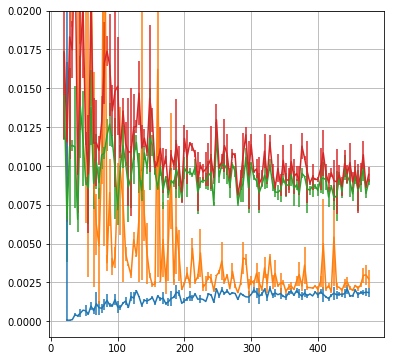

In [83]:
bins = np.linspace(0,0.01,20)

averages = []
stds = []
fig,ax1 = plt.subplots(1,1,figsize = [6,6])
N_values = np.arange(40,500,4)
for N in N_values:
    x,y,z,noise = tools.generate_data(N)
    X = get_X_poly2D(x, y, deg = 5)
    
    _, mse_train, _, mse_test = tools.k_fold_val(x,y,z, k = 2)
    _, mse_train_2, _, mse_test_2 = tools.k_fold_val(x,y,z, k = 2, lmbd=0.05)
    
#     z_gt = FrankeFunction(x,y)

#     regr = Lasso( alpha = alpha ,fit_intercept = False)
#     regr.fit(X, z)
    
#     Lasso 
    # plt.hist(mse_train,bins=bins, histtype = 'step', density=False)
    
    averages.append([np.average(v) for v in [mse_test, mse_train, mse_test_2, mse_train_2]])
    stds.append([np.std(v) for v in [mse_test, mse_train, mse_test_2, mse_train_2]])
    
averages = np.array(averages).T
stds = np.array(stds).T
print(averages.shape)
ax1.errorbar(N_values-20, averages[0], yerr = stds[0])
ax1.errorbar(N_values-20, averages[1], yerr = stds[1])

ax1.errorbar(N_values-20, averages[2], yerr = stds[2])
ax1.errorbar(N_values-20, averages[3], yerr = stds[3])
ax1.grid() 
# ax2.grid() 
ax1.set_ylim([-0.001,0.02])
# ax2.set_ylim([-0.001,0.02])


/home/halvard/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


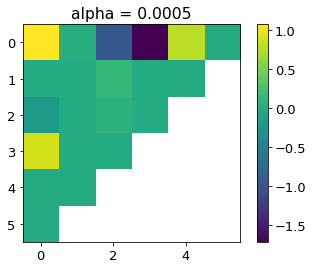

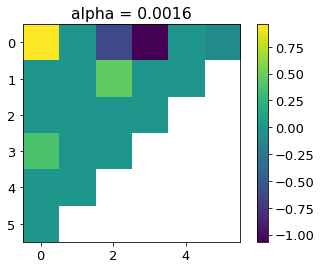

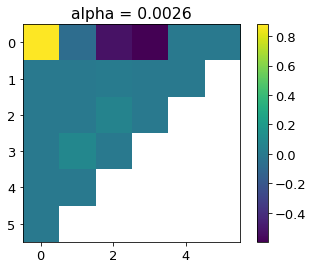

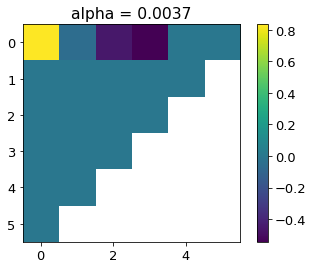

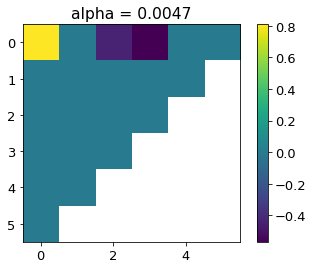

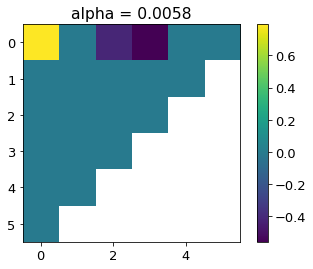

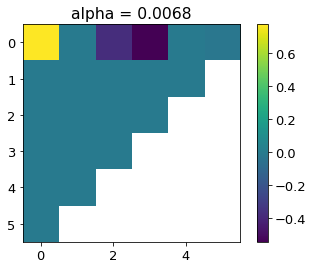

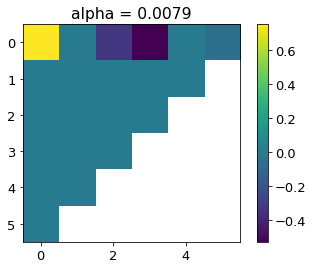

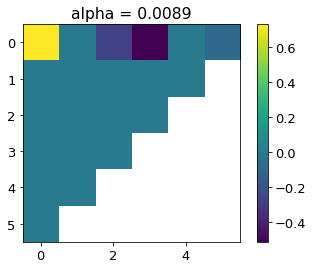

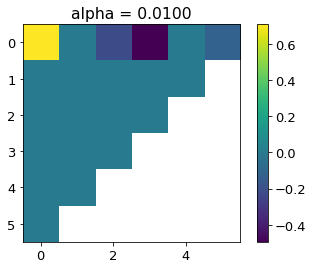

In [539]:
from plotting import contour_plot
from sklearn.linear_model import Lasso

X = get_X_poly2D(x, y, deg = deg)
z_gt = FrankeFunction(x,y)

for alpha in np.linspace(0.0005, 0.010, 10):
    regr = Lasso( alpha = alpha ,fit_intercept = False)
    regr.fit(X, z)

    beta = regr.coef_
    
    zhat = regr.predict(X)
    
    df_exps = tools.get_exp_coeffs(beta, deg = 5, print_beta=False)
    plt.figure()
    plt.title('alpha = {:.4f}'.format(alpha))
    m = plt.imshow(df_exps)
    plt.colorbar(m)
#     fig = contour_plot(regr, plot_err = True)
#     print('total feil: {}'.format(np.sum(np.abs(zhat - z_gt))))
#     fig.suptitle('alpha = {:.4f}'.format(alpha))

In [505]:
symX = X.T @ X
N = symX.shape[0]
lmbd = 0.1

from scipy import linalg
beta = linalg.inv(symX + lmbd*np.eye(N)) @ X.T @ z

beta

array([ 1.04948433,  0.31587174, -0.59975137, -2.37211183,  1.06348865,
       -1.30871314, -0.31673332, -0.53403607,  0.7794553 ,  0.66725102,
        0.92394962, -0.22067446, -0.15441648,  0.49624127,  0.74632533,
        0.80436718,  0.07710595, -0.13821876, -0.19922415, -0.35494877,
       -0.60611638])

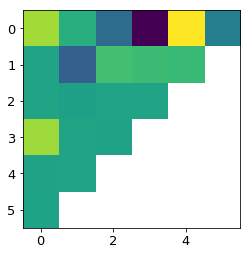

In [534]:
df_exps = tools.get_exp_coeffs(beta, deg = 5, print_beta = False)
plt.imshow(df_exps)

      c:  1.08
    y^1:  0.18
    y^2: -0.90
    y^3: -2.28
    y^4:  1.63
    y^5: -0.59
x^1 y^1: -1.08
x^1 y^2:  0.46
x^1 y^3:  0.39
x^1 y^4:  0.37
   x^2 : -0.00
x^2 y^1: -0.06
   x^3 :  1.05
x^3 y^2: -0.02
   x^4 : -0.03
   x^5 : -0.02


/home/halvard/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


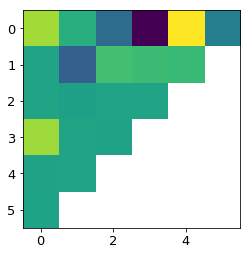

In [529]:
plt.imshow(df_exps)